# Density and Contour Plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

C:\Users\Koushik Mahanta\AppData\Local\Temp\ipykernel_7276\1072485847.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## Visualizing a Three-Dimensional Function

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [12]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [13]:
x

array([0. , 0.5, 1. ])

In [14]:
y

array([0., 1.])

In [15]:
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [16]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [21]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

In [22]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

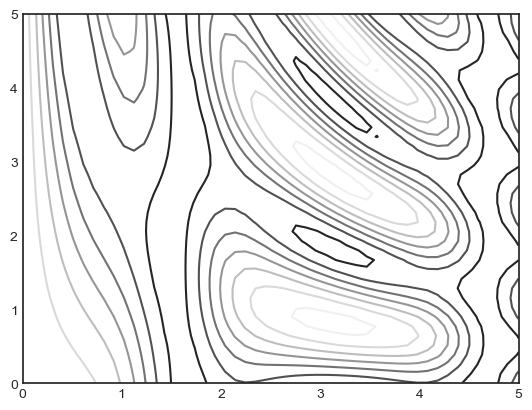

In [26]:
plt.contour(X, Y, Z);

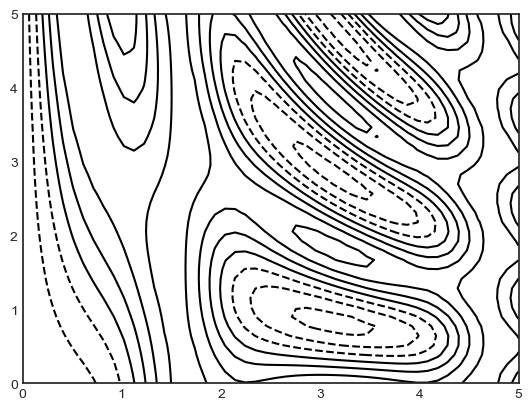

In [28]:
plt.contour(X, Y, Z, colors='black');

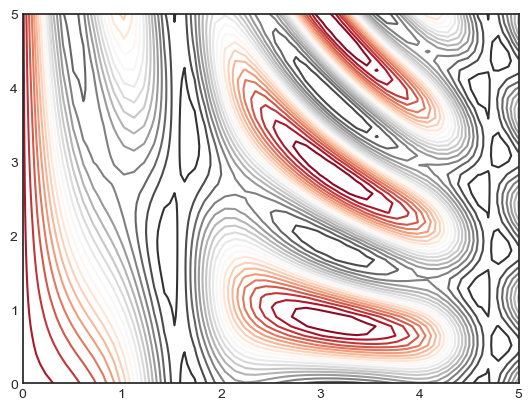

In [31]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

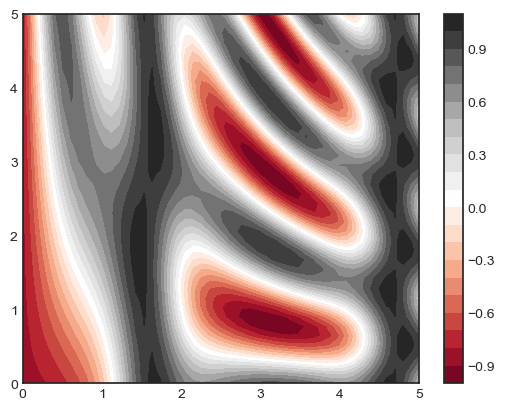

In [62]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

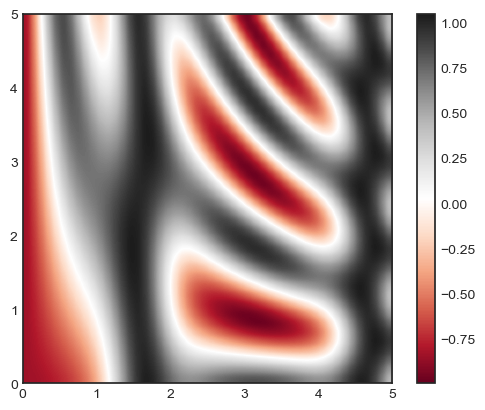

In [47]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
 interpolation='gaussian', aspect='equal')
plt.colorbar();

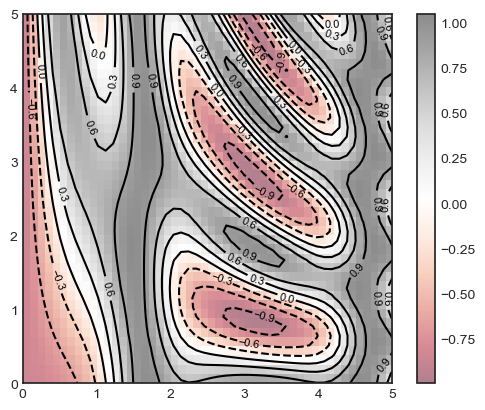

In [57]:
contours = plt.contour(X, Y, Z, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

## Histograms, Binnings, and Density

In [63]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

In [64]:
data.shape

(1000,)

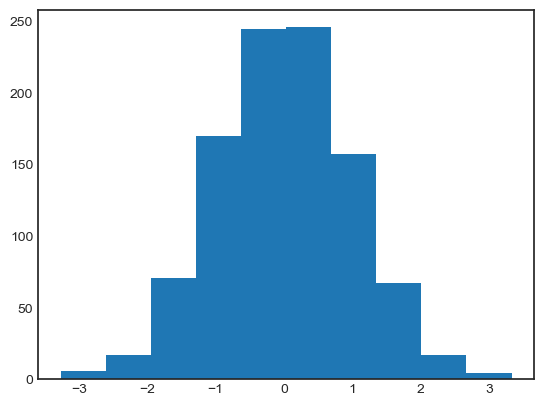

In [65]:
plt.hist(data);

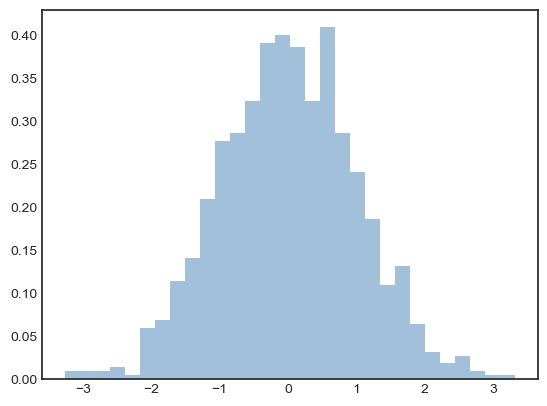

In [76]:
plt.hist(data, bins=30, density=True, alpha=0.5,
 histtype='stepfilled', color='steelblue',
 edgecolor='none');

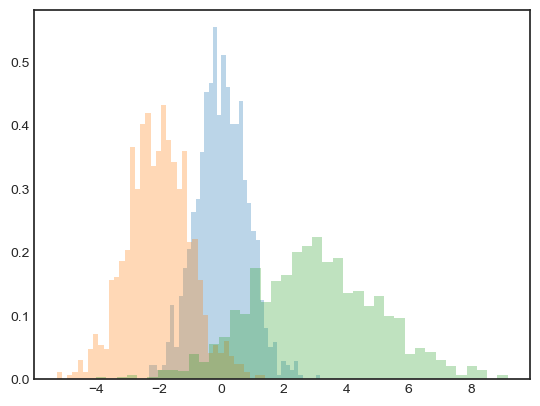

In [83]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you are interested in computing, but not displaying, the histogram (that is, counting the number of points in a given bin), you can use the ```np.histogram``` function:

In [91]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 23 241 491 224  21]
[-3.26668015 -1.94720849 -0.62773683  0.69173484  2.0112065   3.33067816]


## Two-Dimensional Histograms and Binnings

In [92]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

### plt.hist2d: Two-Dimensional Histogram

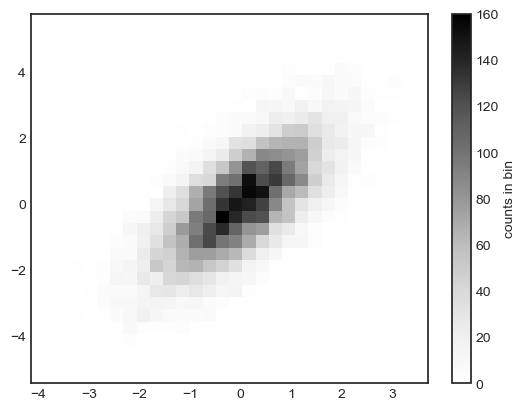

In [93]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

In [94]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


### plt.hexbin: Hexagonal Binnings

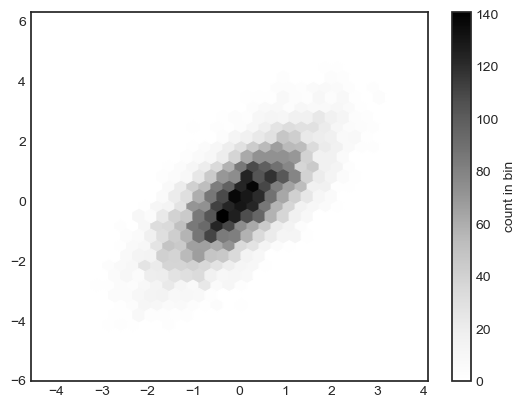

In [99]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

### Kernel Density Estimation

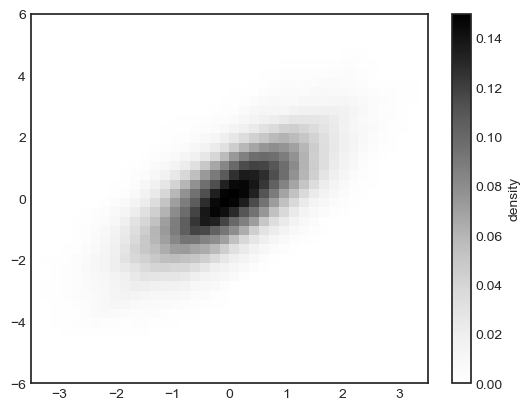

In [100]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)

Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")